/Users/soniadaoud/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in sqrt
/Users/soniadaoud/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt


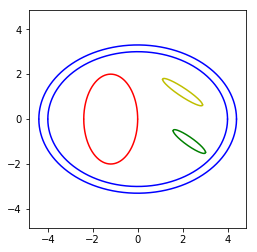

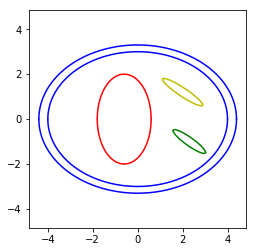

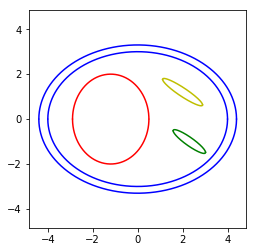

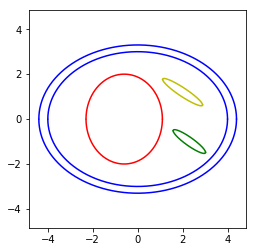

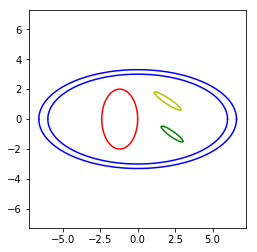

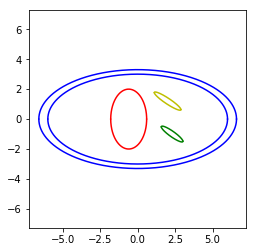

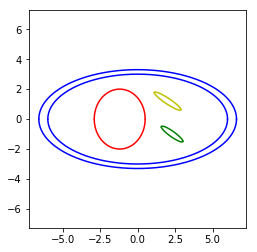

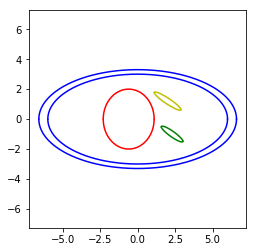

Time to generate 8 plots : 2.276624 seconds 


In [1]:
"""PLOT CARTESIAN ELLIPSE BY DIRECT PLOT"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


#parameters

#Artery wall - Blue
a_wall_in= 5
b_wall_in= 3
thick_wall = 1.1

#Lumen - Red
x_L= -1
a_L = 2.2
b_L = 2

#Lipid mass - Green
x_lip = 2.3
y_lip = -1
a_lip = 0.2
b_lip = 0.4
alpha_lip = np.pi/3 #angle in rad

#Calcium mass - Yellow
x_cal = 2
y_cal = 1.2
a_cal = 0.2
b_cal = 0.5
alpha_cal = np.pi/3 #angle in rad

#Graphs

#Abscisse
x = np.linspace(-10,10,200000)



#general - ellipse centered on x0,y0 with main axis a and small axis b, angle of rotation alpha
def general_ellipse(x0,y0,a,b,alpha):
    A = (b**2)*(np.sin(alpha)**2)+(a**2)*(np.cos(alpha)**2)
    B = 2*(x-x0)*np.cos(alpha)*np.sin(alpha)*((b**2)+(a**2))
    C = ((x-x0)**2)*((b**2)*(np.cos(alpha)**2)+(a**2)*(np.sin(alpha)**2))-(a**2)*(b**2)
    y = y0 + (-B+np.sqrt(B**2-4*A*C))/(2*A)
    z = y0 + (-B-np.sqrt(B**2-4*A*C))/(2*A)
    return y,z

def artery_wall_in(a_wall_in,b_wall_in):
    return general_ellipse(0,0,a_wall_in,b_wall_in,0)

def artery_wall_out(a_wall_out,b_wall_out):
    return general_ellipse(0,0,a_wall_out,b_wall_out,0)

def lumen(x_L,a_L,b_L):
    return general_ellipse(x_L,0,a_L,b_L,0)

def calcium(x_cal,y_cal,a_cal,b_cal,alpha_cal):
    return general_ellipse(x_cal,y_cal,a_cal,b_cal,alpha_cal)

def lipid(x_lip,y_lip,a_lip,b_lip,alpha_lip):
    return general_ellipse(x_lip,y_lip,a_lip,b_lip,alpha_lip)


def artery_plot(a_wall_in, b_wall_in, thick_wall, x_L, a_L, b_L, x_cal, y_cal, a_cal, b_cal, alpha_cal, x_lip, y_lip, a_lip, b_lip, alpha_lip):

    plt.gcf().clear() #flush the previous plot if still loaded

    y_wall_in,z_wall_in=artery_wall_in(a_wall_in,b_wall_in)

    y_wall_out,z_wall_out = artery_wall_out(a_wall_in*thick_wall, b_wall_in*thick_wall)
    plt.plot(x,y_wall_in,'b-')
    plt.plot(x,z_wall_in,'b-')
    plt.plot(x,y_wall_out,'b-')
    plt.plot(x,z_wall_out,'b-')

    y_lumen,z_lumen = lumen(x_L,a_L,b_L)
    plt.plot(x,y_lumen,'r-')
    plt.plot(x,z_lumen,'r-')

    y_calcium,z_calcium = calcium(x_cal,y_cal,a_cal,b_cal,alpha_cal)
    plt.plot(x,y_calcium,'y-')
    plt.plot(x,z_calcium,'y-')

    y_lipid,z_lipid = lipid(x_lip,y_lip,a_lip,b_lip,alpha_lip)
    plt.plot(x,y_lipid,'g-')
    plt.plot(x,z_lipid,'g-')

    plot_limit = a_wall_in*thick_wall*1.1
    plt.xlim([-plot_limit,plot_limit])
    plt.ylim([-plot_limit,plot_limit])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


import time
count = 0
t1 = time.time()
for a_wall_in in [4,6]:
    for a_L in [1.2,1.7]:
        for x_L in [-1.2,-0.6]:
            artery_plot(a_wall_in, b_wall_in, thick_wall,x_L, a_L, b_L, x_cal, y_cal, a_cal, b_cal, alpha_cal,x_lip, y_lip, a_lip, b_lip, alpha_lip)  #will plot only if there is no crossing add return +1 to count
            count +=1

print("Time to generate %d plots : %f seconds "%(count, time.time()-t1))